In [1]:
import numpy as np
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
mu_vec = np.array([0,0,0])
cov_mat = np.array([[1,0,0.8],[0,1,0],[0.8,0,1]])
amostra = np.random.multivariate_normal(mu_vec, cov_mat, 1000).T

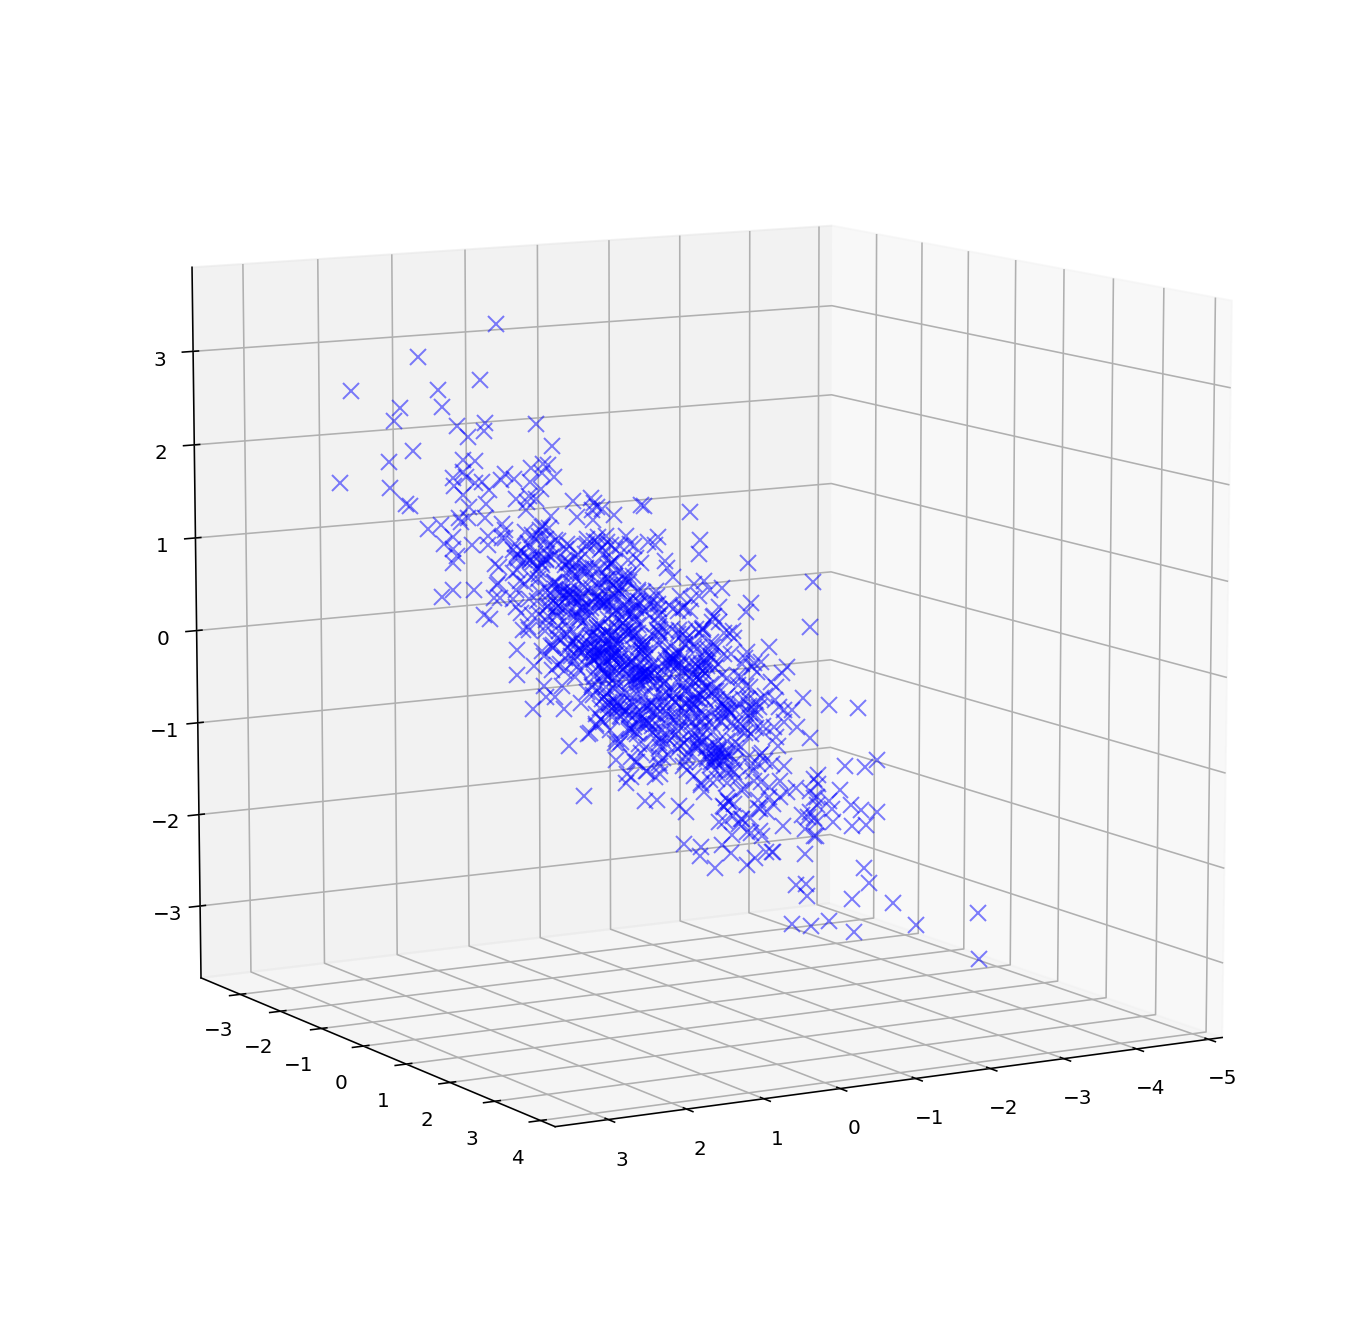

In [3]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 60)
ax.plot(amostra[0,:], amostra[1,:], amostra[2,:], 'x', markersize=8, color='blue', alpha=0.5)


In [4]:
media_x = np.mean(amostra[0,:])
media_y = np.mean(amostra[1,:])
media_z = np.mean(amostra[2,:])
vector_media = np.array([[media_x],[media_y],[media_z]]) #calculo do vector média da amostra


In [5]:
scatter_matrix = np.zeros((3,3))
for i in range(amostra.shape[1]):
    scatter_matrix += (amostra[:,i].reshape(3,1) - vector_media).dot((amostra[:,i].reshape(3,1) - vector_media).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[1012.03106974  -53.98877928  843.15055789]
 [ -53.98877928 1049.93611671  -80.47282557]
 [ 843.15055789  -80.47282557 1047.85010481]]


In [6]:
mat_cov = np.cov([amostra[0,:],amostra[1,:],amostra[2,:]]) #matriz de covariancia amostral

In [7]:
# vectores e valores proprios da scatter matrix 
valprop_sc, vect_prop_sc = np.linalg.eig(scatter_matrix)

# vectores e valores proprios da matriz covariancia (amostral)
valprop_cov, vect_prop_cov = np.linalg.eig(mat_cov)


In [8]:
idx = valprop_sc.argsort()[::-1]   
valprop_sc = valprop_sc[idx]
vect_prop_sc = vect_prop_sc[:,idx]

In [9]:
idx = valprop_cov.argsort()[::-1]   
valprop_cov = valprop_cov[idx]
vect_prop_cov = vect_prop_cov[:,idx] #re-ordenando, por ordem decrescente, os valores próprios, e tomar a mesma ordem para os vectores próprios

In [10]:
valprop_cov

array([1.88605027, 1.04045937, 0.18642058])

In [11]:
valprop_sc[0]/valprop_cov[0],valprop_sc[1]/valprop_cov[1],valprop_sc[2]/valprop_cov[2] #a razao entre os valores próprios entre as duas matrizes é constante, usando a mesma ordem decrescente

(999.0000000000001, 998.9999999999999, 998.9999999999908)

In [12]:
vect_prop_cov

array([[-0.69419158,  0.09413929,  0.71360762],
       [ 0.11349123,  0.99332466, -0.0206363 ],
       [-0.71078674,  0.06666266, -0.7002416 ]])

In [13]:
vect_prop_sc

array([[-0.69419158,  0.09413929,  0.71360762],
       [ 0.11349123,  0.99332466, -0.0206363 ],
       [-0.71078674,  0.06666266, -0.7002416 ]])

In [14]:
# as colunas das matrizes são iguais (ou seja, têm os mesmos vectores próprios, para a mesma ordenação decrescente de valores próprios)

In [15]:
traco_cov=np.trace(mat_cov) #o traço (soma dos elementos diagonais da matriz) é igual à soma dos valores próprios

In [16]:
valprop_cov[0]/traco_cov


0.6058761783582751

In [17]:
(valprop_cov[0]+valprop_cov[1])/traco_cov

0.9401141143800474

In [18]:
w=vect_prop_cov[:,0:2]

In [19]:
w.shape

(3, 2)

In [20]:
w

array([[-0.69419158,  0.09413929],
       [ 0.11349123,  0.99332466],
       [-0.71078674,  0.06666266]])

In [21]:
w[:,0]

array([-0.69419158,  0.11349123, -0.71078674])

In [22]:
amostraT=amostra.T

In [23]:
prod_inter=amostraT.dot(w)

In [24]:
prod_inter1= prod_inter[:,0]
prod_inter2= prod_inter[:,1]

In [25]:
amostra_proj1=np.zeros(shape=(3,len(amostra[1])))
amostra_proj2=np.zeros(shape=(3,len(amostra[1])))

In [26]:
for i in range(len(amostra[1])):
    amostra_proj1[:,i]=prod_inter1[i]*w[:,0]
    amostra_proj2[:,i]=prod_inter2[i]*w[:,1]

In [27]:
amostra_proj=amostra_proj1+amostra_proj2

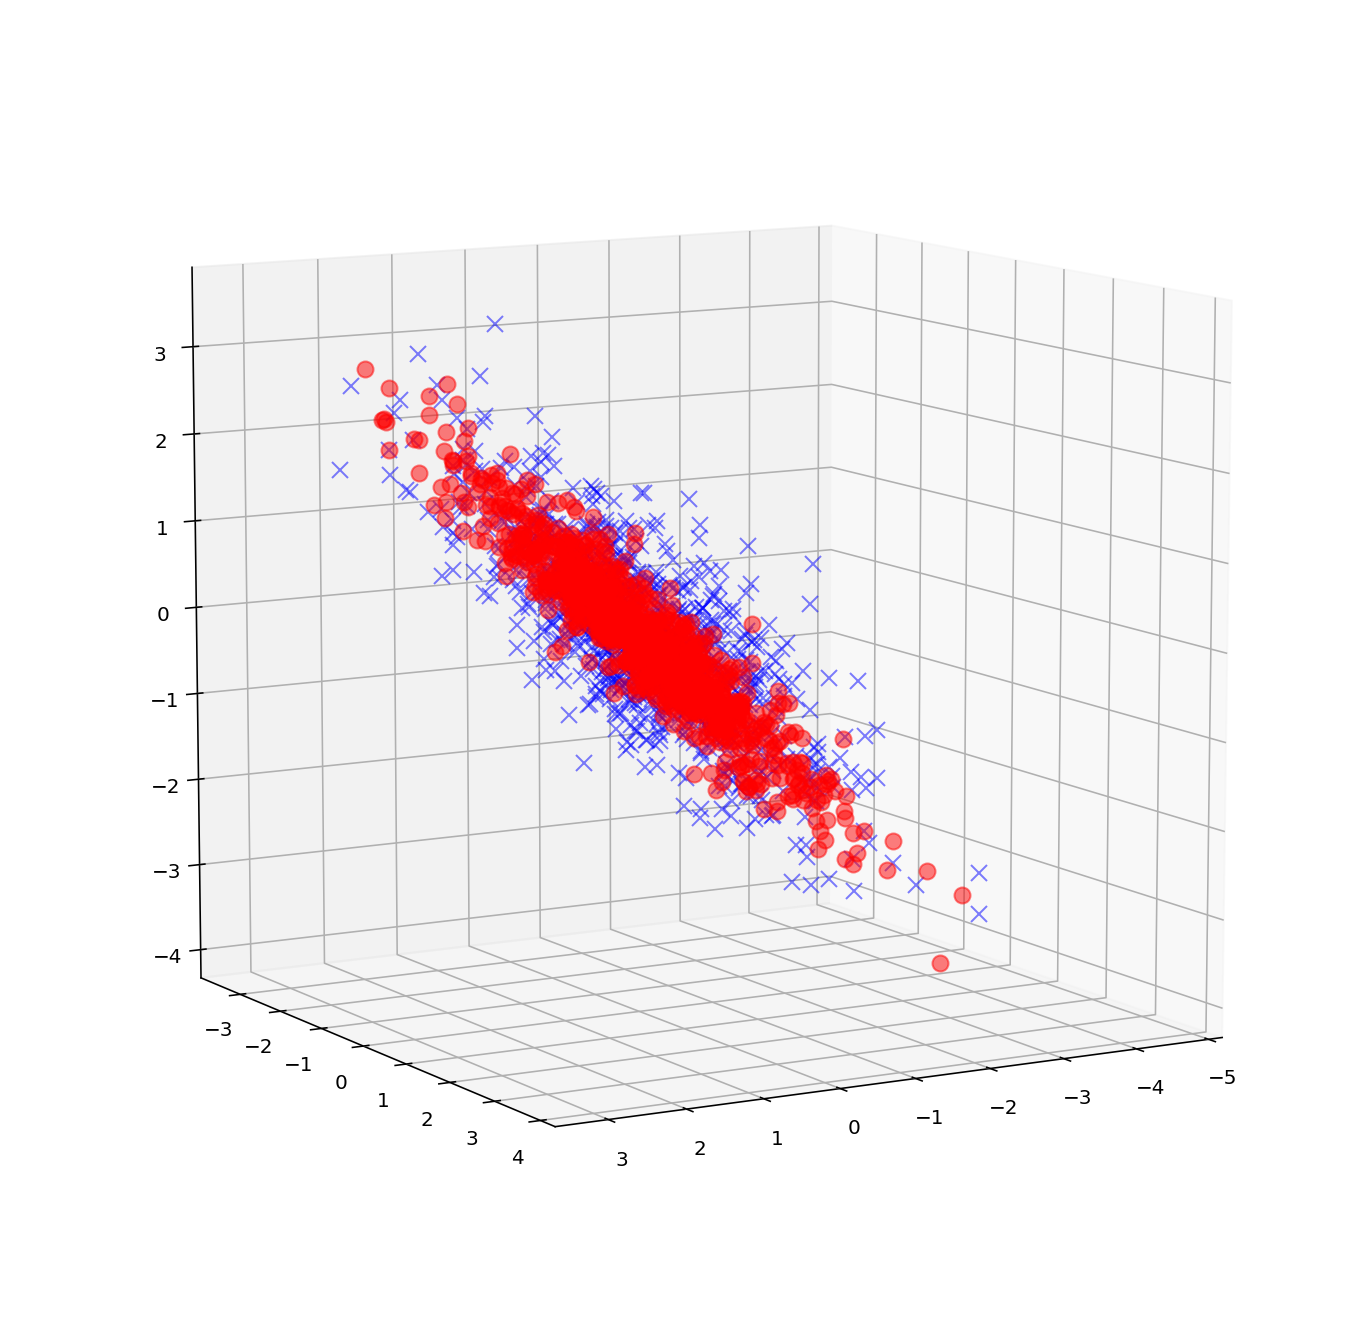

In [28]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 60)
ax.plot(amostra[0,:], amostra[1,:], amostra[2,:], 'x', markersize=8, color='blue', alpha=0.5)
ax.plot(amostra_proj[0,:], amostra_proj[1,:], amostra_proj[2,:], 'o', markersize=8, color='red', alpha=0.5)

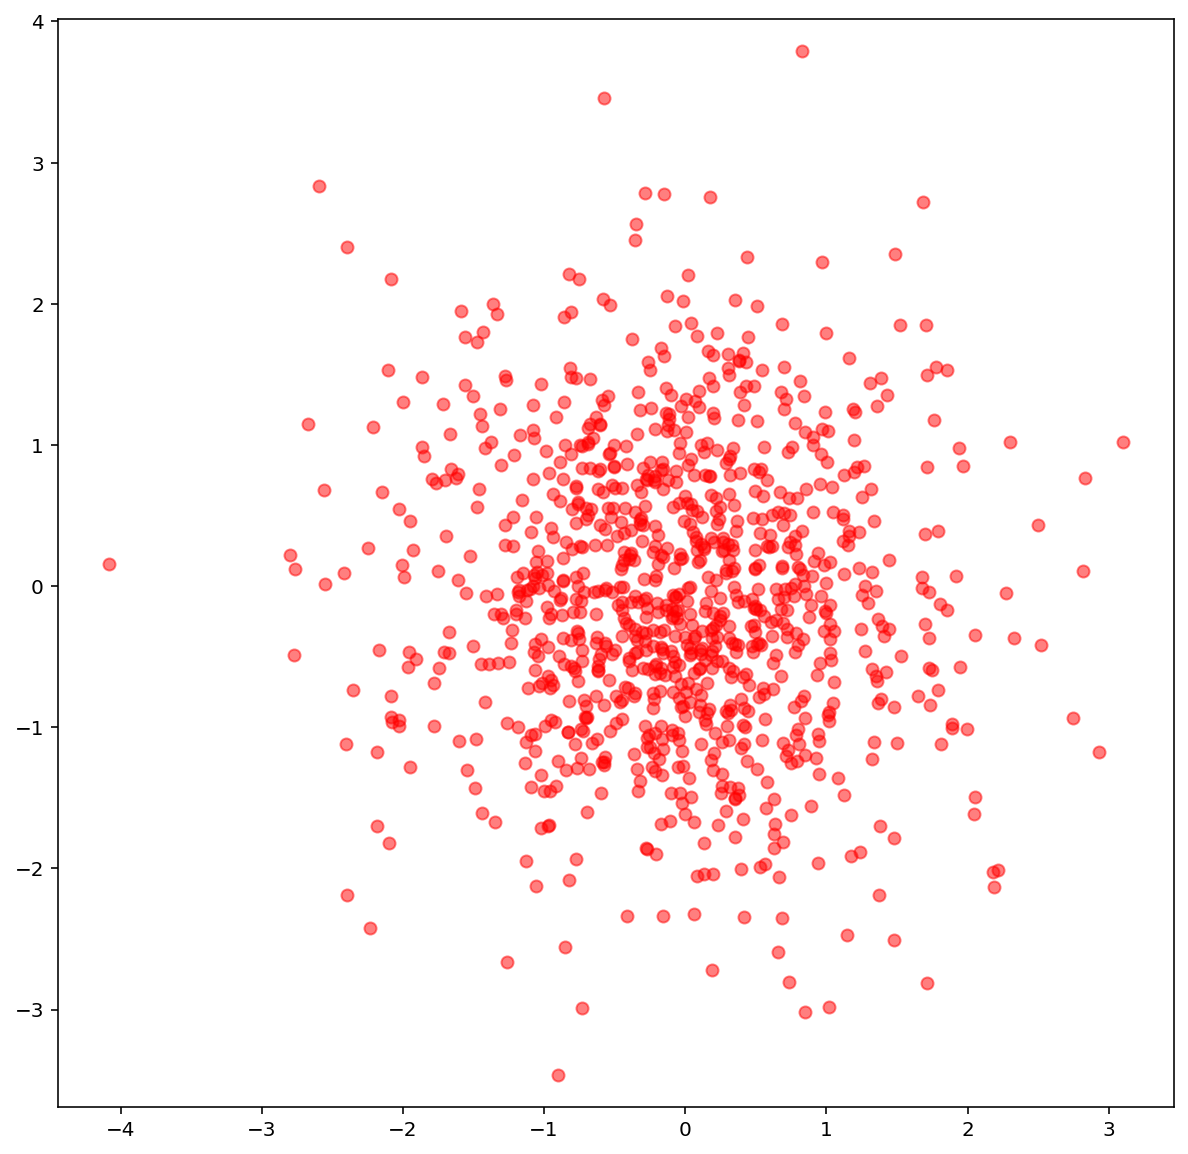

In [29]:
plt.figure(figsize=(10,10))
plt.plot(amostra_proj[0], amostra_proj[1], 'o',color='red', alpha=0.5)
plt.axis('equal')
plt.show()